In [62]:
# 0. Import libraries and set working directory ######################
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#from . import proc_target as ut
import proc_target as ut
path = os.getcwd()
print(path)

c:\Users\Admin\Documents\prob_recession_bolivia\recession_bolivia\recession_bolivia\main


In [63]:
df_feat = pd.read_excel('input/data_selected_sa.xlsx', sheet_name='data1990')
df_feat = df_feat.drop(columns='Recession')
df_feat.rename(columns={'_date_': 'period'}, inplace=True)
df_feat

,period,aereo,agua,antimonio,base,base_r,carretero,ductos,ele_alum,ele_dom,...,plata,plomo,prod_gas,prod_petro,stress_us,vix,wolfram,yield10y_2y,yield10y_3m,zinc
0,1990-01-01,93.491525,98.412444,593.805809,717.122111,4216.364495,104.054934,97.993027,98.757329,89.128377,...,28.719397,1546.180556,260.489171,578162.442282,0.048650,22.900088,78.907906,0.069001,0.277687,8015.185063
1,1990-02-01,90.653911,97.371782,568.808751,719.931239,4223.418093,102.444169,98.734030,99.816067,97.482048,...,25.232747,1686.657815,281.853484,608319.339073,0.049921,22.412841,99.689392,0.071343,0.418067,8525.537663
2,1990-03-01,96.865114,102.768161,665.949738,712.963733,4118.887550,97.112173,99.147070,103.671860,101.233031,...,27.824050,1736.119078,257.569568,571263.458706,0.053373,20.914517,85.836236,0.034196,0.409451,8289.678059
3,1990-04-01,100.576695,100.902924,1128.077934,715.101828,4093.901641,94.925341,99.650273,106.419902,101.126933,...,21.404606,1455.251705,211.224842,598551.358005,0.038736,21.761988,94.945389,0.081105,0.571914,7341.290166
4,1990-05-01,94.400423,100.512705,526.993024,762.943700,4318.909632,96.420323,98.316204,101.389556,102.293689,...,17.843472,1310.635610,236.517227,601265.765859,0.058814,19.456083,91.648639,0.107810,0.558330,7227.886709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,2023-07-01,381.650676,204.543787,342.764057,108133.831607,98291.620909,643.683698,266.857245,750.064302,515.871144,...,125.768281,10269.430460,1067.050649,664587.759954,0.151434,15.689892,148.599533,-0.828332,-1.506847,42125.149322
403,2023-08-01,364.772595,206.342982,203.374731,108417.344142,98258.787850,575.725952,260.855787,772.741367,533.235092,...,118.824028,9057.200352,1037.825202,657872.077063,0.140241,18.402354,132.398608,-0.633200,-1.257745,39987.109574
404,2023-09-01,349.331277,216.254045,391.122650,108288.909158,98028.473525,541.479312,270.625356,759.702978,552.147693,...,111.351101,9606.595705,1086.316096,700475.311083,0.088474,15.055275,114.041481,-0.600354,-1.075212,41152.393890
405,2023-10-01,345.406774,209.291501,376.406464,109135.999652,98895.237924,494.493160,263.216393,740.753224,553.292522,...,104.539748,8205.405013,1062.224054,689355.466854,0.122487,17.095386,218.093298,-0.306208,-0.841537,42610.320819


In [64]:
# Variables do not require conversion into YoY growth rates. They are already expressed in % and are rates
from sklearn.preprocessing import StandardScaler
df_feat_ns = df_feat[['yield10y_2y', 'yield10y_3m', 'vix', 'fed_funds_nom', 'long_term_10y', 'oecd_norm', 'stress_us']]
df_feat_ns

,yield10y_2y,yield10y_3m,vix,fed_funds_nom,long_term_10y,oecd_norm,stress_us
0,0.069001,0.277687,22.900088,8.370787,8.427138,99.987339,0.048650
1,0.071343,0.418067,22.412841,8.394027,8.574299,99.918117,0.049921
2,0.034196,0.409451,20.914517,8.414563,8.515472,99.817815,0.053373
3,0.081105,0.571914,21.761988,8.420550,8.649732,99.675607,0.038736
4,0.107810,0.558330,19.456083,8.227452,8.577194,99.473924,0.058814
...,...,...,...,...,...,...,...
402,-0.828332,-1.506847,15.689892,5.179010,4.040057,99.445185,0.151434
403,-0.633200,-1.257745,18.402354,5.275760,4.278264,99.391837,0.140241
404,-0.600354,-1.075212,15.055275,5.278216,4.420003,99.449695,0.088474
405,-0.306208,-0.841537,17.095386,5.259961,4.640819,99.500527,0.122487


In [65]:
# Standardizing the Variables
variables_a_estandarizar = ['yield10y_2y', 'yield10y_3m', 'vix', 'fed_funds_nom', 'long_term_10y', 'oecd_norm', 'stress_us']
df_feat_std = df_feat_ns[variables_a_estandarizar].copy()
scaler = StandardScaler()
df_feat_std[variables_a_estandarizar] = scaler.fit_transform(df_feat_std[variables_a_estandarizar])
df_feat_std

,yield10y_2y,yield10y_3m,vix,fed_funds_nom,long_term_10y,oecd_norm,stress_us
0,-1.094755,-1.082196,0.445046,2.371839,2.097977,0.173301,-0.597497
1,-1.092176,-0.965529,0.379134,2.381677,2.171907,0.113764,-0.586155
2,-1.133102,-0.972689,0.176452,2.390370,2.142354,0.027497,-0.555332
3,-1.081420,-0.837669,0.291092,2.392905,2.209802,-0.094813,-0.686003
4,-1.051998,-0.848958,-0.020835,2.311164,2.173361,-0.268277,-0.506765
...,...,...,...,...,...,...,...
402,-2.083397,-2.565291,-0.530299,1.020715,-0.105978,-0.292994,0.320094
403,-1.868409,-2.358267,-0.163376,1.061671,0.013691,-0.338877,0.220169
404,-1.832221,-2.206566,-0.616145,1.062711,0.084897,-0.289115,-0.241980
405,-1.508144,-2.012364,-0.340173,1.054983,0.195829,-0.245396,0.061673


In [66]:
colsdrop = ['yield10y_2y', 'yield10y_3m', 'vix', 'fed_funds_nom', 'long_term_10y', 'oecd_norm', 'stress_us', 'ipc_ryc']
df_feat = df_feat.drop(columns=colsdrop)
df_feat = ut.transform_features(df_feat, 'period')
df_feat

,period,aereo,agua,antimonio,base,base_r,carretero,ductos,ele_alum,ele_dom,...,p_trigo,p_urea,p_wti,p_zinc,plata,plomo,prod_gas,prod_petro,wolfram,zinc
0,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,2023-07-01,-0.008542,-1.460503,0.065314,-0.291473,-0.114883,-0.015740,-0.621072,-1.443269,-1.099553,...,-0.556494,-1.089593,-0.893770,-0.805557,0.234083,0.591240,-1.226897,-1.771502,0.135636,-0.172797
403,2023-08-01,-0.158642,-0.457942,-0.455280,-0.204542,-0.044522,-0.094248,-1.046693,-0.386978,-0.875687,...,-0.832009,-0.918246,-0.537771,-1.083111,-0.083954,-0.081192,-1.328795,-1.872299,-0.392024,-0.256989
404,2023-09-01,-0.302060,1.003368,0.302903,-0.272856,-0.101337,-0.127956,-0.663234,-0.605317,0.976585,...,-1.108397,-1.138734,-0.066954,-0.725546,0.019987,0.229349,-0.955846,-1.248939,-0.491713,-0.203381
405,2023-10-01,-0.290718,-0.164690,-0.253549,-0.237293,-0.009803,-0.071708,-0.655152,-1.261475,3.154676,...,-1.368368,-1.014717,-0.311976,-0.639164,-0.111300,-0.259771,-0.826064,-1.016567,0.628444,-0.062363


In [67]:
# Latest Version: Standardized Features and Year-on-Year Rates
df_feat_ = pd.concat([df_feat, df_feat_std], axis=1)
df_feat_

,period,aereo,agua,antimonio,base,base_r,carretero,ductos,ele_alum,ele_dom,...,prod_petro,wolfram,zinc,yield10y_2y,yield10y_3m,vix,fed_funds_nom,long_term_10y,oecd_norm,stress_us
0,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-1.094755,-1.082196,0.445046,2.371839,2.097977,0.173301,-0.597497
1,1990-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-1.092176,-0.965529,0.379134,2.381677,2.171907,0.113764,-0.586155
2,1990-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-1.133102,-0.972689,0.176452,2.390370,2.142354,0.027497,-0.555332
3,1990-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-1.081420,-0.837669,0.291092,2.392905,2.209802,-0.094813,-0.686003
4,1990-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-1.051998,-0.848958,-0.020835,2.311164,2.173361,-0.268277,-0.506765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,2023-07-01,-0.008542,-1.460503,0.065314,-0.291473,-0.114883,-0.015740,-0.621072,-1.443269,-1.099553,...,-1.771502,0.135636,-0.172797,-2.083397,-2.565291,-0.530299,1.020715,-0.105978,-0.292994,0.320094
403,2023-08-01,-0.158642,-0.457942,-0.455280,-0.204542,-0.044522,-0.094248,-1.046693,-0.386978,-0.875687,...,-1.872299,-0.392024,-0.256989,-1.868409,-2.358267,-0.163376,1.061671,0.013691,-0.338877,0.220169
404,2023-09-01,-0.302060,1.003368,0.302903,-0.272856,-0.101337,-0.127956,-0.663234,-0.605317,0.976585,...,-1.248939,-0.491713,-0.203381,-1.832221,-2.206566,-0.616145,1.062711,0.084897,-0.289115,-0.241980
405,2023-10-01,-0.290718,-0.164690,-0.253549,-0.237293,-0.009803,-0.071708,-0.655152,-1.261475,3.154676,...,-1.016567,0.628444,-0.062363,-1.508144,-2.012364,-0.340173,1.054983,0.195829,-0.245396,0.061673


In [68]:
df_feat_.to_csv(f'{path}/output/df_feat.csv', index = False)
print(f'saved in {path}/output/df_feat.csv')

saved in c:\Users\Admin\Documents\prob_recession_bolivia\recession_bolivia\recession_bolivia\main/output/df_feat.csv


## Train Test Split

+ Assigning 75% of data as training set and 30 % as test set

In [69]:
df_recession = pd.read_csv('output/df_recession.csv', delimiter=',')
df_recession

,period,recession,recession_ons_6,recession_ons_12,recession_ons_24,recession_lag_1,past6_recession,past12_recession,past60_recession,past120_recession
0,1990-01-01,0,NaN,NaN,NaN,NaN,0.00,0.000000,0.000000,0.000000
1,1990-02-01,0,1.0,1.0,1.0,0.0,0.00,0.000000,0.000000,0.000000
2,1990-03-01,0,1.0,1.0,1.0,0.0,0.00,0.000000,0.000000,0.000000
3,1990-04-01,1,1.0,1.0,1.0,0.0,0.25,0.250000,0.250000,0.250000
4,1990-05-01,1,1.0,1.0,1.0,1.0,0.40,0.400000,0.400000,0.400000
...,...,...,...,...,...,...,...,...,...,...
402,2023-07-01,0,NaN,NaN,NaN,0.0,0.00,0.333333,0.333333,0.166667
403,2023-08-01,0,NaN,NaN,NaN,0.0,0.00,0.250000,0.333333,0.166667
404,2023-09-01,0,NaN,NaN,NaN,0.0,0.00,0.166667,0.316667,0.166667
405,2023-10-01,0,NaN,NaN,NaN,0.0,0.00,0.083333,0.300000,0.166667


In [70]:
# Latest Version: Standardized Features and Year-on-Year Rates
df_feat_ = df_feat_.drop(columns=['period'])
df_dataset = pd.concat([df_recession, df_feat_], axis=1)
df_dataset

,period,recession,recession_ons_6,recession_ons_12,recession_ons_24,recession_lag_1,past6_recession,past12_recession,past60_recession,past120_recession,...,prod_petro,wolfram,zinc,yield10y_2y,yield10y_3m,vix,fed_funds_nom,long_term_10y,oecd_norm,stress_us
0,1990-01-01,0,NaN,NaN,NaN,NaN,0.00,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,-1.094755,-1.082196,0.445046,2.371839,2.097977,0.173301,-0.597497
1,1990-02-01,0,1.0,1.0,1.0,0.0,0.00,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,-1.092176,-0.965529,0.379134,2.381677,2.171907,0.113764,-0.586155
2,1990-03-01,0,1.0,1.0,1.0,0.0,0.00,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,-1.133102,-0.972689,0.176452,2.390370,2.142354,0.027497,-0.555332
3,1990-04-01,1,1.0,1.0,1.0,0.0,0.25,0.250000,0.250000,0.250000,...,NaN,NaN,NaN,-1.081420,-0.837669,0.291092,2.392905,2.209802,-0.094813,-0.686003
4,1990-05-01,1,1.0,1.0,1.0,1.0,0.40,0.400000,0.400000,0.400000,...,NaN,NaN,NaN,-1.051998,-0.848958,-0.020835,2.311164,2.173361,-0.268277,-0.506765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,2023-07-01,0,NaN,NaN,NaN,0.0,0.00,0.333333,0.333333,0.166667,...,-1.771502,0.135636,-0.172797,-2.083397,-2.565291,-0.530299,1.020715,-0.105978,-0.292994,0.320094
403,2023-08-01,0,NaN,NaN,NaN,0.0,0.00,0.250000,0.333333,0.166667,...,-1.872299,-0.392024,-0.256989,-1.868409,-2.358267,-0.163376,1.061671,0.013691,-0.338877,0.220169
404,2023-09-01,0,NaN,NaN,NaN,0.0,0.00,0.166667,0.316667,0.166667,...,-1.248939,-0.491713,-0.203381,-1.832221,-2.206566,-0.616145,1.062711,0.084897,-0.289115,-0.241980
405,2023-10-01,0,NaN,NaN,NaN,0.0,0.00,0.083333,0.300000,0.166667,...,-1.016567,0.628444,-0.062363,-1.508144,-2.012364,-0.340173,1.054983,0.195829,-0.245396,0.061673


In [71]:
df_dataset = df_dataset.set_index("period") 
df_dataset = df_dataset['1991-01-01':'2023-12-01'] # Note: date format: yyyy-mm-dd
#df_dataset
# Working with onset 0 
df_dataset_ons0 = df_dataset.drop(columns=['recession_ons_6',	'recession_ons_12',	'recession_ons_24'])
df_dataset_ons0

,recession,recession_lag_1,past6_recession,past12_recession,past60_recession,past120_recession,aereo,agua,antimonio,base,...,prod_petro,wolfram,zinc,yield10y_2y,yield10y_3m,vix,fed_funds_nom,long_term_10y,oecd_norm,stress_us
period,,,,,,,,,,,,,,,,,,,,,
1991-01-01,0,0.0,0.0,0.166667,0.153846,0.153846,-0.515930,1.634846,0.225769,0.873768,...,1.478875,0.245056,0.180987,-0.165470,0.050013,0.983174,1.811921,2.031128,-1.870644,0.533640
1991-02-01,0,0.0,0.0,0.166667,0.142857,0.142857,-0.378307,0.735393,0.017145,1.047303,...,0.805183,-0.554091,0.392824,-0.116267,0.090239,0.183233,1.534270,1.859701,-1.784011,0.063817
1991-03-01,0,0.0,0.0,0.166667,0.133333,0.133333,-0.457292,-0.948465,-0.170254,1.555251,...,1.646614,-0.032648,-0.014460,0.017632,0.359379,-0.173091,1.471633,1.903546,-1.610086,-0.152207
1991-04-01,0,0.0,0.0,0.083333,0.125000,0.125000,-0.519367,0.583549,-0.651472,1.761563,...,1.143862,-0.122611,0.432667,0.033056,0.373491,-0.228123,1.392685,1.829974,-1.380434,-0.204989
1991-05-01,0,0.0,0.0,0.000000,0.117647,0.117647,-0.195767,-0.037600,0.640788,1.377331,...,0.935202,-0.087368,0.516702,0.238451,0.568415,-0.202947,1.288636,1.823499,-1.126920,-0.388115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,0,0.0,0.0,0.333333,0.333333,0.166667,-0.008542,-1.460503,0.065314,-0.291473,...,-1.771502,0.135636,-0.172797,-2.083397,-2.565291,-0.530299,1.020715,-0.105978,-0.292994,0.320094
2023-08-01,0,0.0,0.0,0.250000,0.333333,0.166667,-0.158642,-0.457942,-0.455280,-0.204542,...,-1.872299,-0.392024,-0.256989,-1.868409,-2.358267,-0.163376,1.061671,0.013691,-0.338877,0.220169
2023-09-01,0,0.0,0.0,0.166667,0.316667,0.166667,-0.302060,1.003368,0.302903,-0.272856,...,-1.248939,-0.491713,-0.203381,-1.832221,-2.206566,-0.616145,1.062711,0.084897,-0.289115,-0.241980


## Train Test Split

+ Assigning 75% of data as training set and 30 % as test set

In [72]:
df_targets = df_dataset_ons0['recession'].values
df_features = df_dataset_ons0.drop(['recession'], axis=1)

df_training_features = df_dataset_ons0[:'2017-06-01'].drop(['recession'], axis=1)
df_validation_features = df_dataset_ons0['2017-07-01':].drop(['recession'], axis=1)

df_training_targets = df_dataset_ons0[:'2017-06-01']['recession'].values
df_validation_targets = df_dataset_ons0['2017-07-01':]['recession'].values

In [73]:
# training and development (internal validation)
xtr = df_dataset_ons0[:'2003-06-01']
ytr = df_dataset_ons0[:'2003-06-01']['recession'].values
xdev = df_dataset_ons0['2003-07-01':'2017-06-01']
ydev = df_dataset_ons0['2003-07-01':'2017-06-01']['recession'].values

In [74]:
print(len(df_training_features),len(df_training_targets),len(df_targets))
print(len(df_validation_features),len(df_validation_targets),len(df_features))

318 318 395
77 77 395


## Modelling

+ As the dataset is too small and recessions are in continuous in time series, we cannot use cross validation functions as folds with only one class will be formed.

+ Thus, loop and iteration of hyperparamets is done in hypertuning Logistic Regression.

In [75]:
# import packages for modelling
#!pip install xgboost
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.model_selection import TimeSeriesSplit
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [76]:
df_training_targets

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

LR: 0.645489 (0.092375)
LR_L1: 0.670650 (0.157829)
LR_L2: 0.767790 (0.170721)


LDA: 0.796269 (0.132533)
KNN: 0.466777 (0.070440)
GB: 0.842308 (0.157692)
ABC: 0.970237 (0.020054)
RF: 0.917824 (0.056286)
XGB: 0.950912 (0.010253)


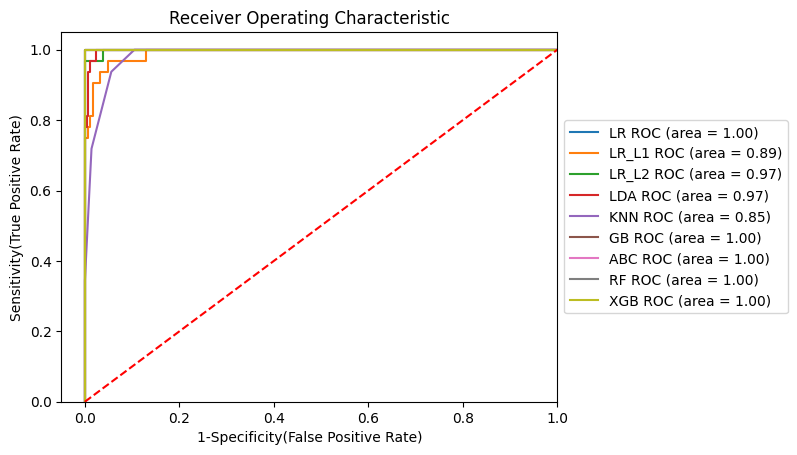

In [77]:
seed=8
scoring='roc_auc' 
kfold = model_selection.TimeSeriesSplit(n_splits=2) 
models = []

models.append(('LR', LogisticRegression(C=1e09)))
models.append(('LR_L1', LogisticRegression(penalty = 'l1',solver='liblinear')))
models.append(('LR_L2', LogisticRegression(penalty = 'l2')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', xgb.XGBClassifier()))

results = []
names = []
lb = preprocessing.LabelBinarizer()

for name, model in models:
    cv_results = model_selection.cross_val_score(estimator = model, X = df_training_features, 
                                                 y = lb.fit_transform(df_training_targets), cv=kfold, scoring = scoring)
    
    model.fit(df_training_features, df_training_targets) # train the model
    fpr, tpr, thresholds = metrics.roc_curve(df_training_targets, model.predict_proba(df_training_features)[:,1])
    auc = metrics.roc_auc_score(df_training_targets,model.predict(df_training_features))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (name, auc))
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show() 
warnings.filterwarnings('ignore')

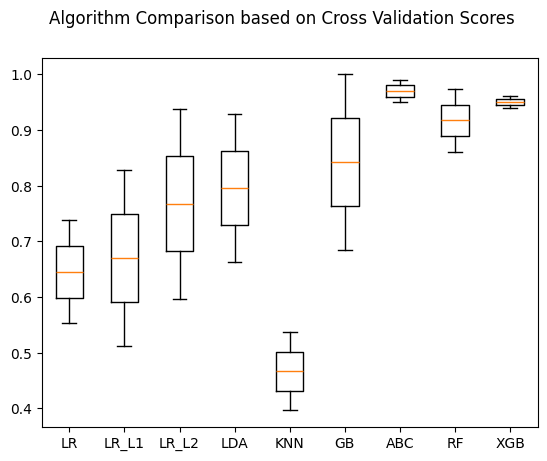

In [78]:

fig = plt.figure()
fig.suptitle('Algorithm Comparison based on Cross Validation Scores')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Hypertuning Logistic Regression

In [79]:
from sklearn.metrics import roc_auc_score
C = np.reciprocal([0.00000001, 0.00000005, 0.0000001, 0.0000005, 0.000001, 0.000005, 0.00001, 0.00005, 
                         0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000])
penalty = ['l1','l2']

penals = pd.DataFrame(index=penalty)
cs = []
scrs = []
for p in penalty:
        scores = []
        params = pd.DataFrame(index=C)
        for c in C:
            model = LogisticRegression(C=c, max_iter=10000, penalty=p, solver='liblinear')
            lr1 = model.fit(xtr,ytr)
            ypreds = lr1.predict(xdev)
            score = roc_auc_score(ydev,ypreds)
            scores.append(score)
        params['rocauc'] = scores
        maxc = params['rocauc'].idxmax()
        maxsc = params['rocauc'].max()
        scrs.append(maxsc)
        cs.append(maxc)
penals['C'] = cs
penals['score'] = scrs
penals

,C,score
l1,200.0,1.000000
l2,100000000.0,0.616993


In [80]:
model = LogisticRegression(C=0.002, penalty='l2', max_iter=10000, solver='liblinear')
lr2 = model.fit(df_training_features, df_training_targets)
ypreds = lr2.predict(df_validation_features)
param = lr2.get_params()
score = roc_auc_score(df_validation_targets, ypreds)
score

0.5100877192982456

## XGBoost model

In [81]:
seed = 8
scoring = 'roc_auc' 
kfold = model_selection.TimeSeriesSplit(n_splits=2) 
lb = preprocessing.LabelBinarizer()
xgboost = model_selection.GridSearchCV(estimator=xgb.XGBClassifier(),
                                       param_grid={'booster': ['gbtree'],
                                                  'max_depth':[2,3,5,10],
                                                  'learning_rate':[0.01,0.1,1]},
                                       scoring=scoring, cv=kfold).fit(df_training_features, 
                                                                      lb.fit_transform(df_training_targets)).best_estimator_
xgboost.fit(df_training_features, df_training_targets)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [82]:
modelxg = xgb.XGBClassifier(learning_rate=0.001,n_estimators=1000,max_depth=100,booster='gbtree',n_jobs=-1).fit(df_training_features, df_training_targets)
ypredsxgb = modelxg.predict(df_validation_features)

xgbscore = roc_auc_score(df_validation_targets,ypredsxgb)
xgbscore

0.5

## Preliminary Results

In [83]:
import datetime
# define periods of recession
rec_spans = []

# Date format: YYYY-MM-DD
rec_spans.append([datetime.datetime(1994,9,1), datetime.datetime(1994,12,1)])
rec_spans.append([datetime.datetime(1995,4,1), datetime.datetime(1995,4,1)])
rec_spans.append([datetime.datetime(2001,12,1), datetime.datetime(2002,2,1)])
rec_spans.append([datetime.datetime(2004,8,1), datetime.datetime(2004,11,1)])

rec_spans.append([datetime.datetime(2005,5,1), datetime.datetime(2005,10,1)])
rec_spans.append([datetime.datetime(2006,1,1), datetime.datetime(2006,1,1)])
rec_spans.append([datetime.datetime(2008,8,1), datetime.datetime(2008,11,1)])

rec_spans.append([datetime.datetime(2018,9,1), datetime.datetime(2018,12,1)])
rec_spans.append([datetime.datetime(2019,7,1), datetime.datetime(2019,11,1)])
rec_spans.append([datetime.datetime(2020,2,1), datetime.datetime(2020,4,1)])
rec_spans.append([datetime.datetime(2020,12,1), datetime.datetime(2021,2,1)])
rec_spans.append([datetime.datetime(2022,7,1), datetime.datetime(2022,11,1)])

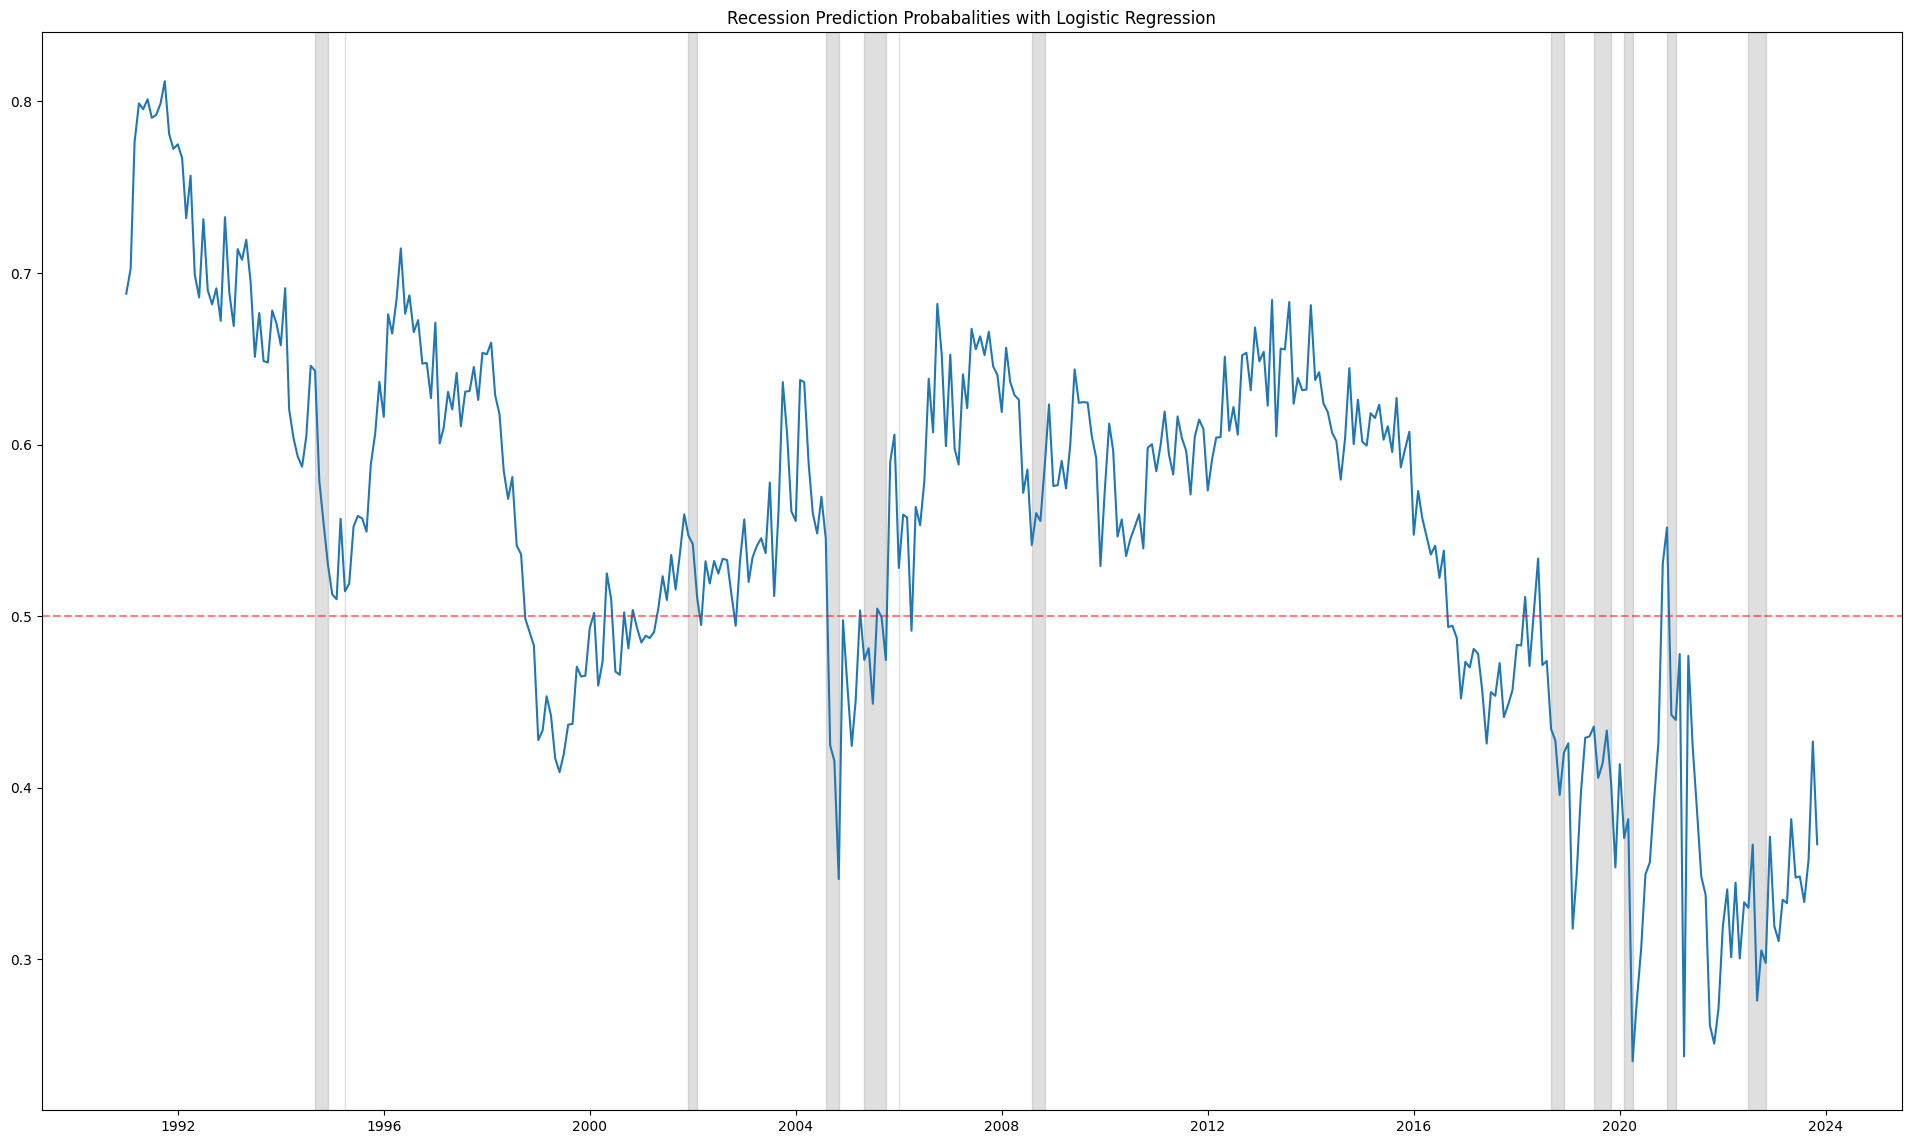

In [84]:
prob_predictions = lr2.predict_proba(df_training_features)
prob_predictions = np.append(prob_predictions, lr2.predict_proba(df_validation_features), axis=0)
sample_range = pd.date_range(start='1/1/1991', end='11/1/2023', freq='MS')

plt.figure(figsize=(24,14))
plt.plot(sample_range.to_series().values, prob_predictions[:,0])
for i in range(len(rec_spans)):
    plt.axvspan(rec_spans[i][0], rec_spans[i][len(rec_spans[i]) - 1], alpha=0.25, color='grey')
plt.axhline(y=0.5, color='r', ls='dashed', alpha = 0.5)
plt.title('Recession Prediction Probabalities with Logistic Regression')
plt.show()

# Feature Importance

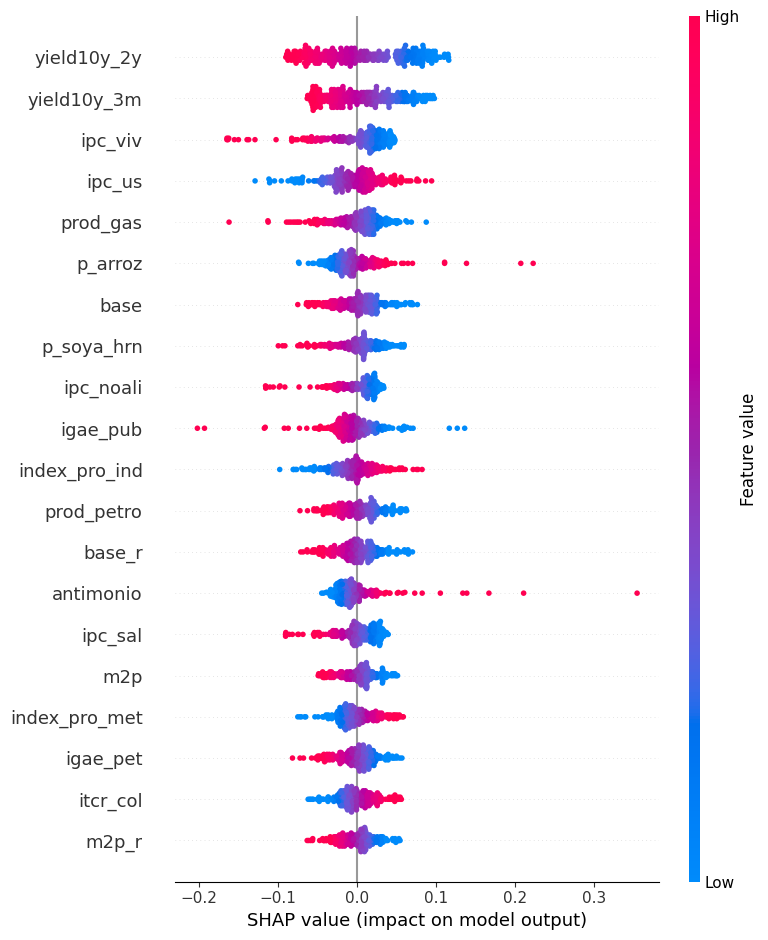

In [85]:
#pip install shap
import shap
# load your data here, e.g. X and y
# create and fit your model here
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.LinearExplainer(lr2,df_training_features)
shap_values = explainer.shap_values(df_training_features.values)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
#shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

shap.summary_plot(shap_values, df_training_features)